# Grade: 100 points

# Assignment 01: Linear Regression

## Instructions

#### Follow These Steps before submitting your assignment 

1. Complete the notebook.

2. Make sure all plots have axis labels.

3. Once the notebook is complete, `Restart` your kernel by clicking 'Kernel' > 'Restart & Run All'.

4. Fix any errors until your notebook runs without any problems.

5. Submit one completed notebook for the group to OWL by the deadline.

6. Please note, a random seed of 42 needs to be set to ensure the reproducability of the results -- *DO NOT* change this random seed. **If you call additional functions that are based on random number generators, you will need to define their seed to 42 as well**. 

7. Make sure to reference all external code and documentation used.


# Q1 - Data Loading and Exploration

`Dataset_Assignment1.csv` lists the soccer players participated in the 2022 FIFA World Cup. Our ultimate goal is to find the best ML model among three candidates that can best predict a player's monetary "Value". The dataset has the following attributes:

Age: Player age in years
Nationality: Players nationality
Overall: Player overall performance score (higher better)
Potential: Player potential score (higher better)
Club: Player home soccer club
Value: Player value i.e, the amount of money a club should pay in order to purchase the player (higher better)
Wage: Player stipend (higher better)
Preferred Foot: Player preferred foot to play
International Reputation: Player international fame (higher better)
Week Foot: Performance score of player weak foot (higher better)
Skill Moves: Player move skill score (higher better)
Body Type: Player body type
Position: Position player holds on the pitch
Height: Player height in CM
Weight: Player weight in kg

1. Load the dataset.
2. Display basic statistics and inspect for missing data.
3. Visualize the distribution of numerical columns.
4. **Discussion Question:** Why is it important to explore and visualize the data before building any models? What types of trends or problems could you uncover at this stage?

In [113]:
# Answer to Q1.1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

DATA_PATH = "Dataset_Assignment1.csv"
df = pd.read_csv(DATA_PATH) 

In [114]:
# Answer to Q1.2
display(df.info()) # Check for data types and non-null counts
display(df.describe) # Summary statistics for numeric columns

df.isnull().sum() # Count of missing values per column
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4903 entries, 0 to 4902
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4903 non-null   int64  
 1   Nationality               4903 non-null   object 
 2   Overall                   4903 non-null   int64  
 3   Potential                 4903 non-null   int64  
 4   Club                      4903 non-null   object 
 5   Value                     4903 non-null   int64  
 6   Wage                      4903 non-null   int64  
 7   Preferred Foot            4903 non-null   object 
 8   International Reputation  4903 non-null   int64  
 9   Weak Foot                 4903 non-null   float64
 10  Skill Moves               4903 non-null   int64  
 11  Body Type                 4903 non-null   object 
 12  Position                  4903 non-null   object 
 13  Height                    4903 non-null   int64  
 14  Weight  

None

<bound method NDFrame.describe of       Age Nationality  Overall  Potential                 Club      Value  \
0      27    Portugal       60         71    Manchester United   94945966   
1      30   Argentina       72         69           Sevilla FC  109997274   
2      31     Belgium       64         69      Manchester City   71177809   
3      25       Italy       68         63                Inter  120524289   
4      27     Germany       64         64    FC Bayern München   84570513   
...   ...         ...      ...        ...                  ...        ...   
4898   27    China PR       69         80           Jiangsu FC  122310374   
4899   28       India       68         60  NorthEast United FC  109516282   
4900   31    China PR       68         77        Meizhou Hakka   83474805   
4901   20   Argentina       61         73       Atlanta United   82953773   
4902   16     Romania       62         76     Gaz Metan Mediaş  100967840   

        Wage Preferred Foot  Internationa


Total missing values: 0


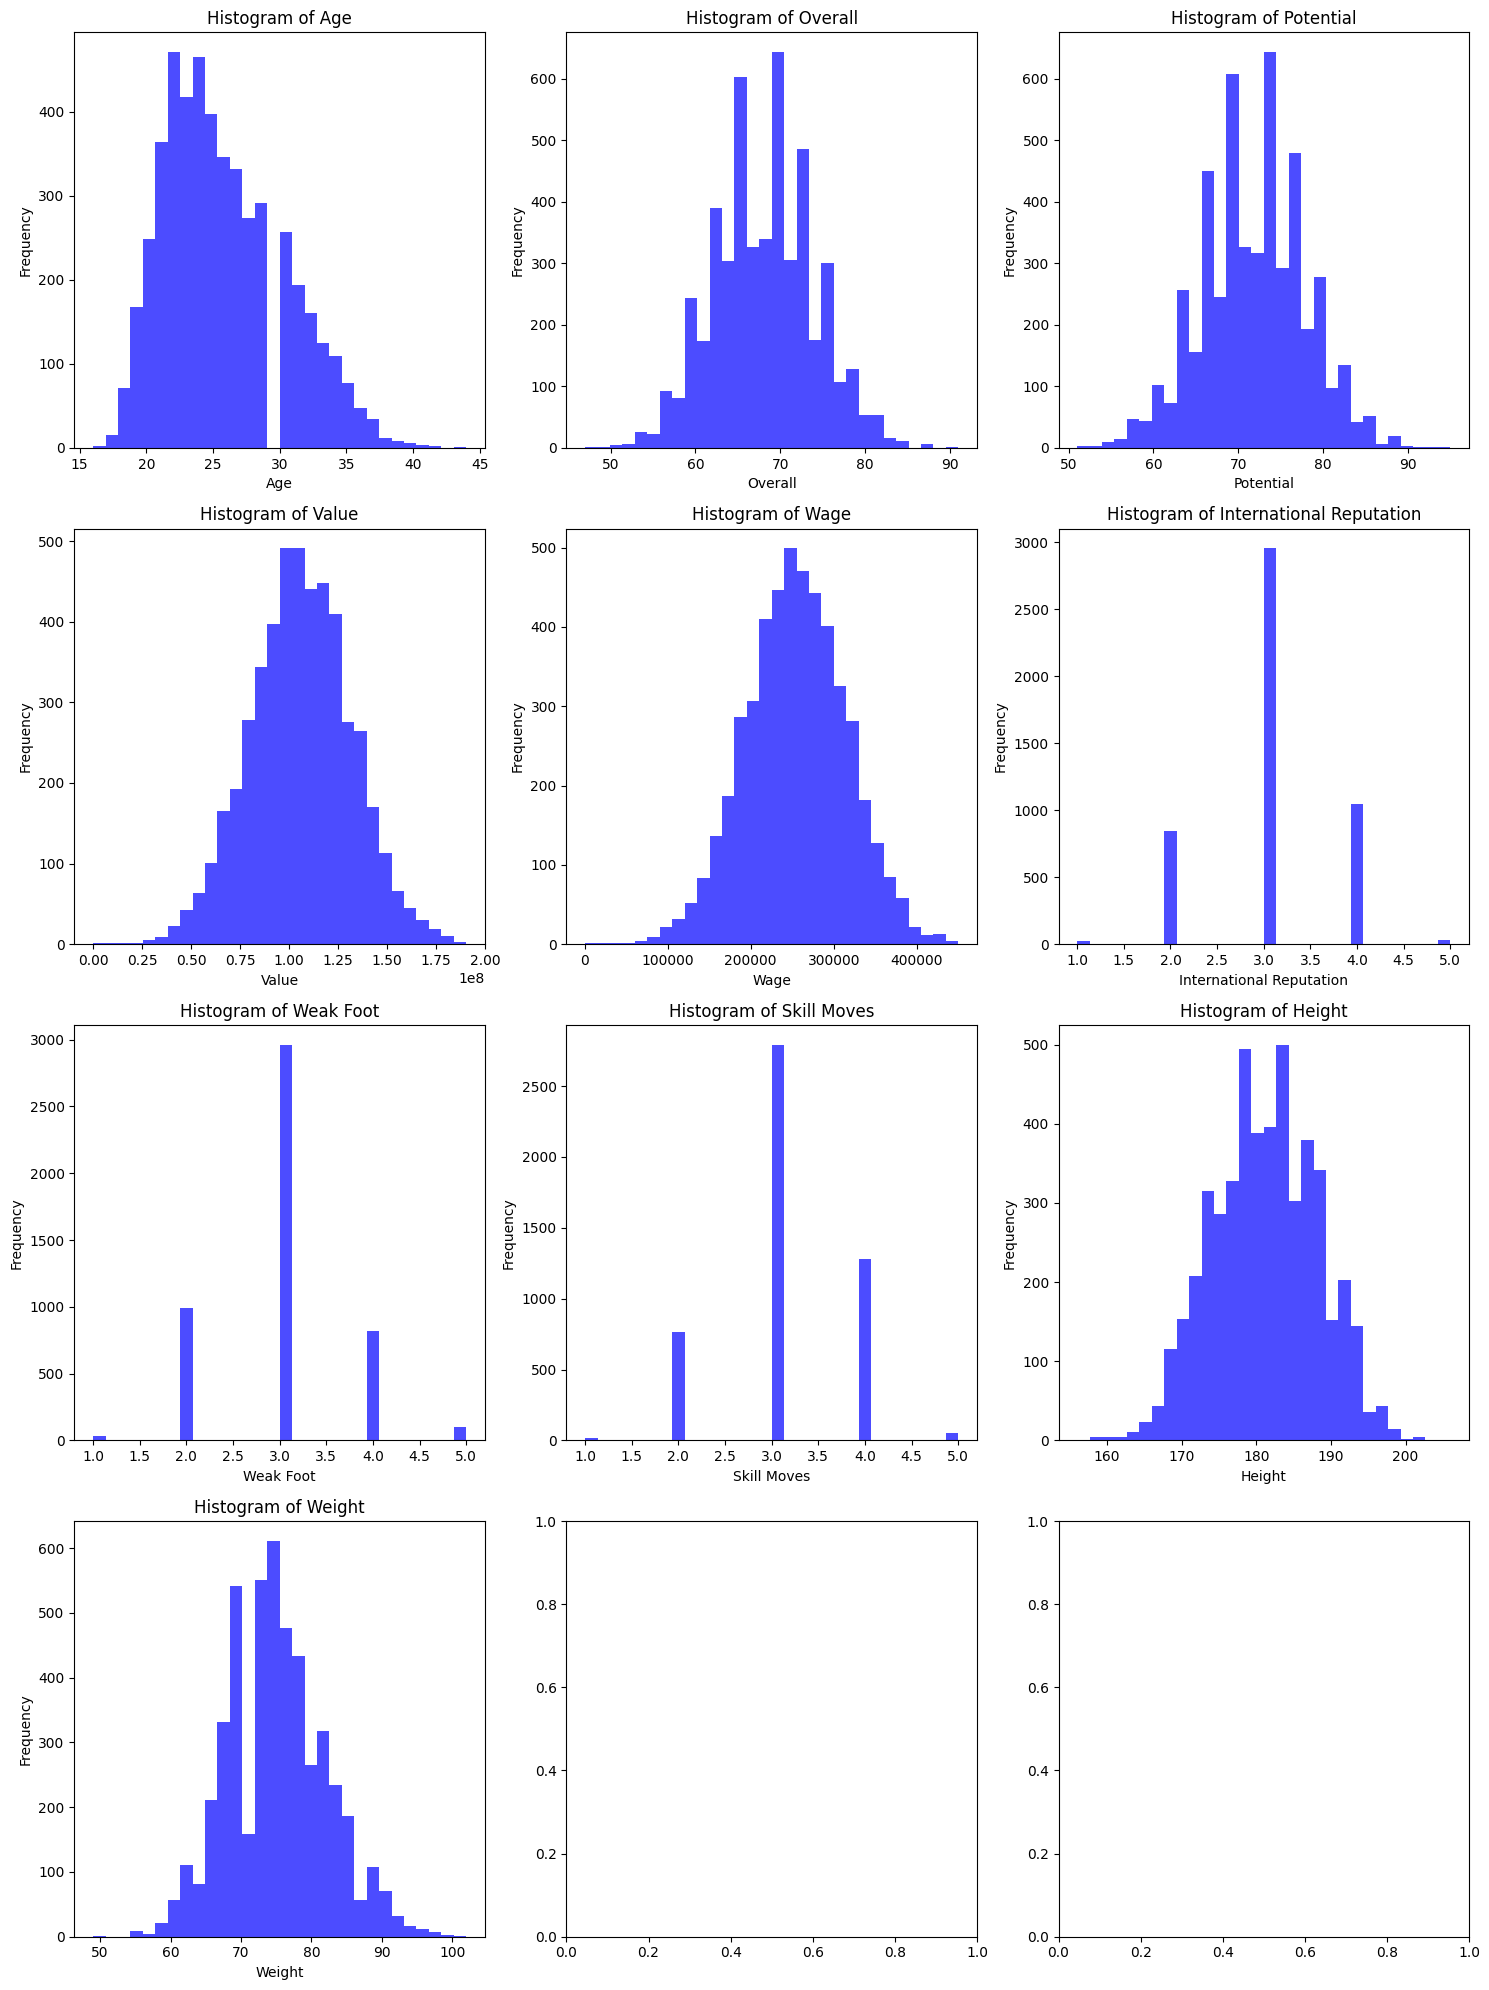

In [115]:
# Answer to Q1.3
num_cols = df.select_dtypes(include=np.number).columns.tolist()
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col].dropna(), bins=30, color='blue', alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency') 

plt.tight_layout()
plt.show()

**Answer to Q1.4**: Its important to visualize and inspect data before building models because there could be missing data, misinformed data, outliers, and helps us decide what actually we are dealing with. If data is non linear then it could perform poorly for linear models and also just misleading conclusions and chances of poor performance. 


# Q2 - Feature extraction

1. Plot the joint distribution between `Weight` and `Height`.
2. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m². With this knowledge, see if you can do some meaningful feature extraction and then drop Weight and Height. 

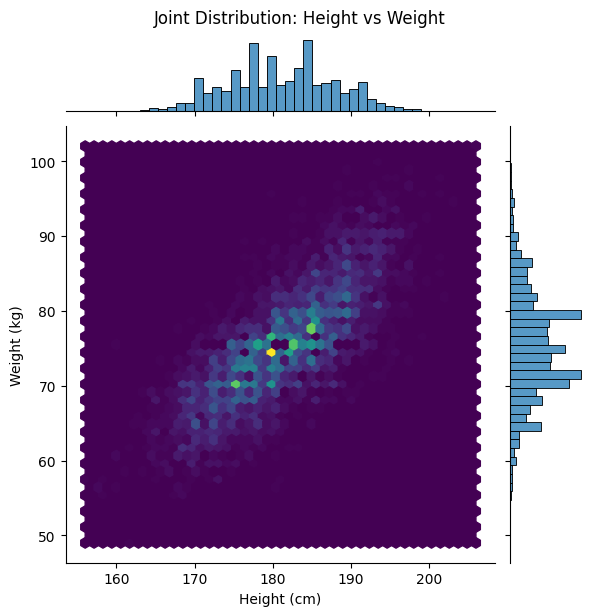

In [116]:
# Answer to Q2.1
jp = sns.jointplot(data=df, x="Height", y="Weight", kind="hex", height=6, cmap="viridis")
jp.ax_joint.set_xlabel("Height (cm)")
jp.ax_joint.set_ylabel("Weight (kg)")
jp.fig.suptitle("Joint Distribution: Height vs Weight", y=1.02)
plt.show()

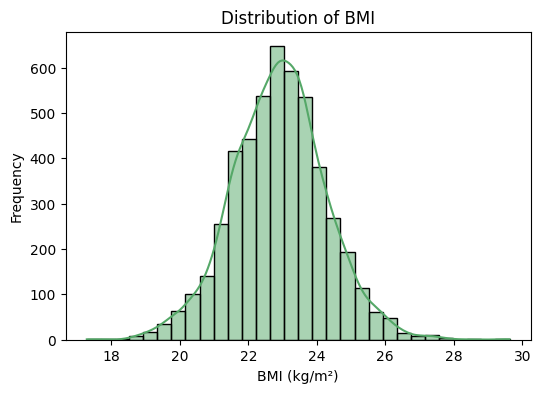

   Age Nationality  Overall  Potential               Club      Value    Wage  \
0   27    Portugal       60         71  Manchester United   94945966  216612   
1   30   Argentina       72         69         Sevilla FC  109997274  228284   
2   31     Belgium       64         69    Manchester City   71177809  201220   
3   25       Italy       68         63              Inter  120524289  302959   
4   27     Germany       64         64  FC Bayern München   84570513  275595   

  Preferred Foot  International Reputation  Weak Foot  Skill Moves Body Type  \
0          Right                         3        3.0            2    Stocky   
1           Left                         3        3.0            3    Stocky   
2          Right                         2        5.0            3    Stocky   
3          Right                         3        3.0            2    Normal   
4          Right                         3        4.0            3    Normal   

  Position        BMI  
0   Middle  21

In [117]:
# Answer to Q2.2
df['Height_m'] = df['Height'] / 100
df['BMI'] = df['Weight'] / (df['Height_m'] ** 2)

plt.figure(figsize=(6,4))
sns.histplot(df["BMI"].dropna(), bins=30, kde=True, color="#55A868")
plt.title("Distribution of BMI")
plt.xlabel("BMI (kg/m²)")
plt.ylabel("Frequency")
plt.show()

df = df.drop(columns=['Height_m', 'Height', 'Weight'])
print(df.head())

# Q3 - Correlation and Feature Selection

1. Compute correlation between numerical features.
2. Visualize correlations using a heatmap to identify highly correlated features.
3. Choose the most correlated feature with the target variable (`Value`) for simple linear regression.
4. **Discussion Question:** How do you interpret a correlation value? Does a higher correlation always mean a feature is more important?

In [118]:
# Answer to Q3.1
num_cols = df.select_dtypes(include=np.number).columns.tolist() # List of numeric columns
if 'Value' not in num_cols:
    raise TypeError("The 'Value' column is not numeric or does not exist in the DataFrame.")

corr = df[num_cols].corr(method='pearson')
display(corr.round(3))

,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,BMI
Age,1.000,0.024,-0.002,-0.008,-0.004,-0.002,0.086,0.008,0.236
Overall,0.024,1.000,0.263,0.450,0.073,0.055,0.008,0.145,-0.002
Potential,-0.002,0.263,1.000,0.481,0.123,0.238,-0.026,0.192,0.012
Value,-0.008,0.450,0.481,1.000,0.684,0.355,-0.012,0.154,0.016
Wage,-0.004,0.073,0.123,0.684,1.000,0.222,-0.022,0.197,0.015
International Reputation,-0.002,0.055,0.238,0.355,0.222,1.000,0.034,0.182,-0.009
Weak Foot,0.086,0.008,-0.026,-0.012,-0.022,0.034,1.000,0.036,0.010
Skill Moves,0.008,0.145,0.192,0.154,0.197,0.182,0.036,1.000,-0.003
BMI,0.236,-0.002,0.012,0.016,0.015,-0.009,0.010,-0.003,1.000


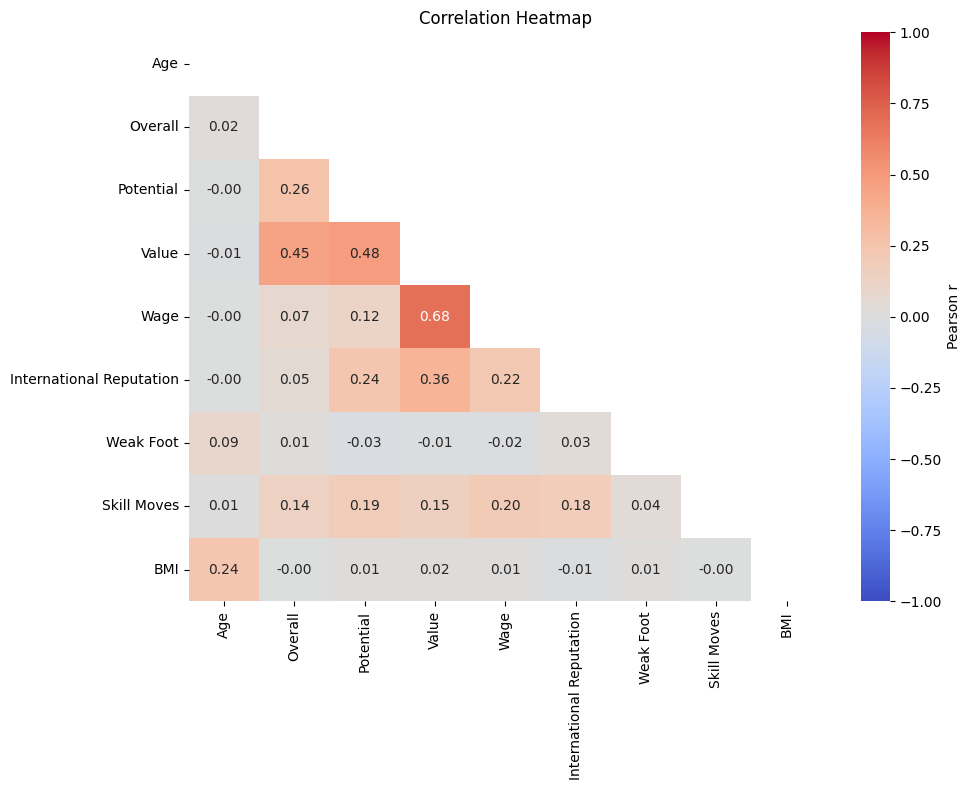

In [119]:
# Answer to Q3.2
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))  # show lower triangle only
sns.heatmap(
    corr, mask=mask, annot=True, fmt=".2f",
    cmap="coolwarm", vmin=-1, vmax=1,
    cbar_kws={"label": "Pearson r"}
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [120]:
# Answer to Q3.3
# Find the feature most correlated with the target 'Value'
corr_with_value = (
    corr['Value']
    .drop(labels='Value')             # remove self-correlation
    .reindex(corr.columns)            # keep consistent order
    .sort_values(key=np.abs, ascending=False)  # sort by absolute correlation
)

top_feature = corr_with_value.index[0]
top_r = corr_with_value.iloc[0]

print(f"\nMost correlated with Value: {top_feature} (r = {top_r:.3f})")

# Save for later use in Q4
selected_feature = top_feature


Most correlated with Value: Wage (r = 0.684)


**# Answer to Q3.4**: Not neccesarly because correlation can be implied as linear or non-linear. This can result in strong relationship either way and a feature could be correlated with one but not as good when combined with others. It is a great way to understand the meaning between different values but in my opinion it doesnt favor any specific feature and just shows the big picture with correlation (pearson) ranges from -1 to 1. 

# Q4 - Data Normalization & Simple Linear Regression

1. Select one highly correlated numerical feature and build a simple linear regression model to predict the target variable.
2. Split the data into 80% training and 20% test sets (use the random seed of 42). 
3. Normalize the dataset.
4. Rebuild the simple linear regression model with normalized data.
5. Compare the normalized and non-normalized data visually. 
6. Compare performance of the normalized and non-normalized models visually and using R² and RMSE.
7. **Discussion Question:** Why might normalizing data improve model performance? In which situations might normalization not be beneficial?
8. Visualize the relationship between the selected feature and the predicted target variable.
9. **Discussion Question:** What could cause a simple linear regression model to perform poorly, even if the correlation is high?

In [121]:
# Answer to Q4.1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df[[selected_feature]]  # Feature matrix
y = df['Value']            # Target vector

In [122]:
# Answer to Q4.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# Answer to Q4.3
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [124]:
# Answer to Q4.4
model_raw = LinearRegression()
model_raw.fit(X_train, y_train)

model_norm = LinearRegression()
model_norm.fit(X_train_norm, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


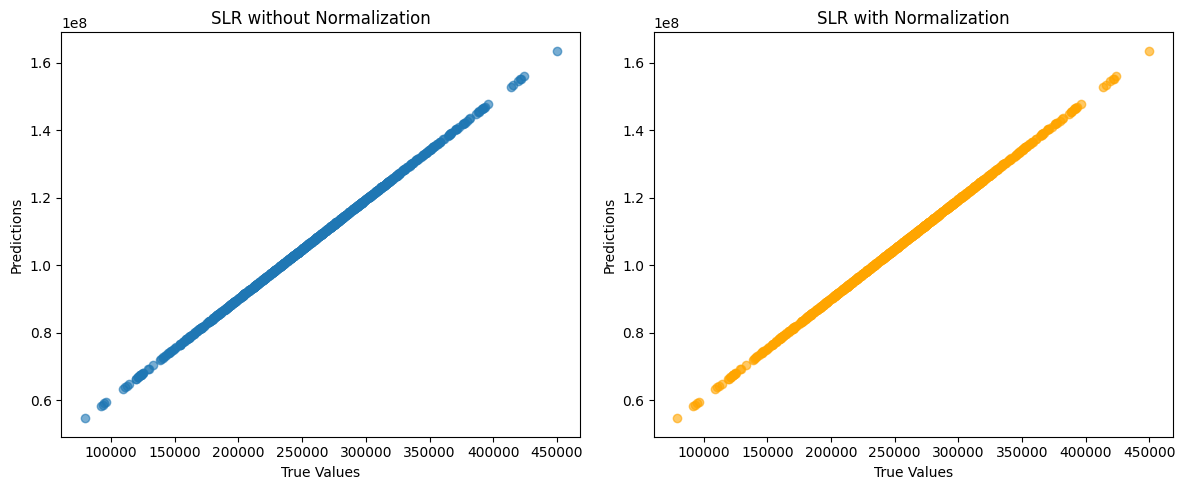

In [125]:
# Answer to Q4.5
y_pred_raw = model_raw.predict(X_test)
y_pred_norm = model_norm.predict(X_test_norm)

plt.figure(figsize=(12, 5))

# Scatter raw
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_pred_raw, alpha=0.6)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("SLR without Normalization")

# Scatter normalized
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_pred_norm, alpha=0.6, color='orange')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("SLR with Normalization")

plt.tight_layout()
plt.show()

In [126]:
# Answer to Q4.6

# Metrics for raw
r2_raw = r2_score(y_test, y_pred_raw)
rmse_raw = np.sqrt(mean_squared_error(y_test, y_pred_raw))

# Metrics for normalized
r2_norm = r2_score(y_test, y_pred_norm)
rmse_norm = np.sqrt(mean_squared_error(y_test, y_pred_norm))

print(f"Without normalization: R²={r2_raw:.3f}, RMSE={rmse_raw:.3f}")
print(f"With normalization:   R²={r2_norm:.3f}, RMSE={rmse_norm:.3f}")

Without normalization: R²=0.466, RMSE=18591498.223
With normalization:   R²=0.466, RMSE=18591498.223


**# Answer to Q4.7**: Normalization allows all features to be on the same scale and prevents large values from showing off. For simple linear regression with one feature normalization doesnt change R^2 or RMSE but rather just rescales coefficients. 

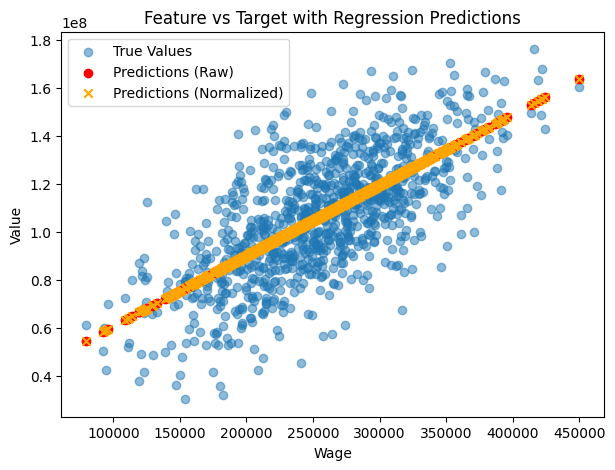

In [127]:
# Answer to Q4.8
plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, alpha=0.5, label="True Values")
plt.scatter(X_test, y_pred_raw, color="red", label="Predictions (Raw)")
plt.scatter(X_test, y_pred_norm, color="orange", label="Predictions (Normalized)", marker="x")
plt.xlabel(selected_feature)
plt.ylabel("Value")
plt.title("Feature vs Target with Regression Predictions")
plt.legend()
plt.show()


**# Answer to Q4.9**: to perform poorly it would have outliers and may not contain important features. Correlation measures linear strength and a true relationship might be non linear. 


# Q 5 - Multiple Linear Regression

1. Select numerical features with correlation above certain thresholds (e.g., 0.2, 0.4, and 0.6).
2. Build three different multiple linear regression models using different sets of features based on correlation thresholds.
3. Evaluate and compare these models using R² and RMSE.
4. **Discussion Question:** How do we decide which features to include in a multiple linear regression model? What challenges might arise from using too many features?

In [128]:
# Answer to Q5.1
target = "Value"
num_cols = df.select_dtypes(include=np.number).columns.tolist()
assert target in num_cols, "Value must be numeric."

# Correlation of each numeric feature with the target
corr_to_target = (
    df[num_cols].corr(method="pearson")[target]
    .drop(labels=target)
    .sort_values(key=np.abs, ascending=False)
)
display(corr_to_target.to_frame("r_with_Value").round(3))

def features_above(thresh: float):
    feats = corr_to_target[ corr_to_target.abs() >= thresh ].index.tolist()
    # Fallback: always keep at least the top feature
    if len(feats) == 0:
        feats = [corr_to_target.index[0]]
    return feats

feats_0_2 = features_above(0.2)
feats_0_4 = features_above(0.4)
feats_0_6 = features_above(0.6)

print(f">=0.2: {len(feats_0_2)} features -> {feats_0_2}")
print(f">=0.4: {len(feats_0_4)} features -> {feats_0_4}")
print(f">=0.6: {len(feats_0_6)} features -> {feats_0_6}")

,r_with_Value
Wage,0.684
Potential,0.481
Overall,0.450
International Reputation,0.355
Skill Moves,0.154
BMI,0.016
Weak Foot,-0.012
Age,-0.008


>=0.2: 4 features -> ['Wage', 'Potential', 'Overall', 'International Reputation']
>=0.4: 3 features -> ['Wage', 'Potential', 'Overall']
>=0.6: 1 features -> ['Wage']


In [129]:
# Answer to Q5.2
def fit_eval(features, alpha=1.0):
    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_norm, y_train)

    y_pred = model.predict(X_test_norm)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return model, (r2, rmse), features, (X_train_norm, X_test_norm, y_train, y_test)

models = {}

# Model using features with |r| >= 0.2
models["threshold_0.2"] = fit_eval(feats_0_2, alpha=10.0)

# Model using features with |r| >= 0.4
models["threshold_0.4"] = fit_eval(feats_0_4, alpha=10.0)

# Model using features with |r| >= 0.6
models["threshold_0.6"] = fit_eval(feats_0_6, alpha=10.0)

# Compare the models
for key, value in models.items():
    model, (r2, rmse), features_used, _ = value
    print(f"Model for {key}:")
    print(f"  Features used: {features_used}")
    print(f"  R² = {r2:.4f}")
    print(f"  RMSE = {rmse:.4f}\n")

Model for threshold_0.2:
  Features used: ['Wage', 'Potential', 'Overall', 'International Reputation']
  R² = 0.7151
  RMSE = 13585924.8182

Model for threshold_0.4:
  Features used: ['Wage', 'Potential', 'Overall']
  R² = 0.6948
  RMSE = 14060756.4450

Model for threshold_0.6:
  Features used: ['Wage']
  R² = 0.4664
  RMSE = 18591498.2231



/opt/anaconda3/envs/DS3000env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/DS3000env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/DS3000env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/DS3000env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/DS3000env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/anaconda3/envs/DS3000env/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280:

In [130]:
# Answer to Q5.3
# Compare the MLR models
print(f"MLR with |r| >= 0.2 ({len(feats_0_2)} features): R² = {r2_0_2:.4f}, RMSE = {rmse_0_2:.4f}")
print(f"MLR with |r| >= 0.4 ({len(feats_0_4)} features): R² = {r2_0_4:.4f}, RMSE = {rmse_0_4:.4f}")
print(f"MLR with |r| >= 0.6 ({len(feats_0_6)} features): R² = {r2_0_6:.4f}, RMSE = {rmse_0_6:.4f}")

MLR with |r| >= 0.2 (4 features): R² = 0.7111, RMSE = 13679183.4081
MLR with |r| >= 0.4 (3 features): R² = 0.6907, RMSE = 14153938.3573
MLR with |r| >= 0.6 (1 features): R² = 0.4643, RMSE = 18627910.5192


**# Answer to Q5.4**: 

# Q6 - Model Evaluation and Comparison

1. Compare all models (simple and multiple regression models) by printing there R² and RMSE values.
2. **Discussion Question:** Which model performs the best and why?
3. **Discussion Question:** If a model has a high R² value but a large RMSE, what might that indicate about the model's performance?
4. **Discussion Question:** Discuss next steps or potential improvements to the models.

In [131]:
print(f"SLR_model -> R²: {r2_norm:.4f}, RMSE: {rmse_norm:.4f}")
print(f"MLR_model_4features -> R²: {r2_0_2:.4f}, RMSE: {rmse_0_2:.4f}")
print(f"MLR_model_3features -> R²: {r2_0_4:.4f}, RMSE: {rmse_0_4:.4f}")
print(f"MLR_model_1features -> R²: {r2_0_6:.4f}, RMSE: {rmse_0_6:.4f}")

SLR_model -> R²: 0.4664, RMSE: 18591498.2231
MLR_model_4features -> R²: 0.7111, RMSE: 13679183.4081
MLR_model_3features -> R²: 0.6907, RMSE: 14153938.3573
MLR_model_1features -> R²: 0.4643, RMSE: 18627910.5192


In [ ]:
# Answer to Q6.1
# Compare all models
print("Model Comparison:")
print(f"SLR (normalized) -> R²: {r2_norm:.4f}, RMSE: {rmse_norm:.4f}")
print(f"MLR (|r| >= 0.2, {len(feats_0_2)} features) -> R²: {r2_0_2:.4f}, RMSE: {rmse_0_2:.4f}")
print(f"MLR (|r| >= 0.4, {len(feats_0_4)} features) -> R²: {r2_0_4:.4f}, RMSE: {rmse_0_4:.4f}")
print(f"MLR (|r| >= 0.6, {len(feats_0_6)} features) -> R²: {r2_0_6:.4f}, RMSE: {rmse_0_6:.4f}")

Model Comparison:
SLR (normalized) -> R²: 0.4664, RMSE: 18591498.2231
MLR (|r| >= 0.2, 4 features) -> R²: 0.7111, RMSE: 13679183.4081
MLR (|r| >= 0.4, 3 features) -> R²: 0.6907, RMSE: 14153938.3573
MLR (|r| >= 0.6, 1 features) -> R²: 0.4643, RMSE: 18627910.5192


**Answer to Q6.2**: The model with >=0.2 performs the best because of a high R^2 and low RMSE value. It includes more features and less off compared to the other models

**Answer to Q6.3**: A high R^2 and large RMSE indicates that the model explains much of the variance but has large prediction errors, possible outliers, and scale issues in the target variable.

**Answer to Q6.4**: Well validating it with cross-validation and test on new data can be implemented. Also trying to regulize it better so that the model can focus on stabalizing coefficients and reduce overfitting. Many more things but these could be next steps for model improvement. 

# Q7 - GenAI

1. **Discussion Question:** Did you use GenAI and if so, how?
2. **Discussion Question:** What limitations did you encounter and how did you overcome them?

**Answer to Q7.1**: 

**Answer to Q7.2**: 